# Analysis of 2015 CCHRC Air Source Heat Pump Study Data

In [1]:
import pandas as pd
import numpy as np
# import matplotlib pyplot commands
from matplotlib.pyplot import *
# Show Plots in the Notebook
%matplotlib inline
 
# 'style' the plot like fivethirtyeight.com website
style.use('bmh')

In [2]:
rcParams['figure.figsize']= (9, 6)   # set Chart Size
rcParams['font.size'] = 14            # set Font size in Chart

In [3]:
fn = 'data/Dillingham_DLG_DHP_TenSecond.dat'
f = open(fn)
for i in range(5):
    print(f.readline())

"TOA5","Dillingham","CR1000","27206","CR1000.Std.27","CPU:ASHP DHP 2014.CR1","34100","DLG_DHP_TenSecond"

"TIMESTAMP","RECORD","DLG_DeliveryT1_F","DLG_DeliveryT2_F","DLG_DeliveryT3_F","DLG_ReturnT1_F","DLG_ReturnT2_F","DLG_ReturnT3_F","DLG_CoilT_F","DLG_OutsideT_F","DLG_Electricity_W_Avg","DLG_Airflow_fpm_Avg"

"TS","RN","","","","","","","","","",""

"","","Smp","Smp","Smp","Smp","Smp","Smp","Smp","Smp","Avg","Avg"

"2014-10-04 18:03:20",0,49.86922,49.72235,49.672,49.88553,49.8515,49.86922,30.51785,30.51633,"NAN",0.1071669



In [10]:
dfd = pd.read_csv(fn, skiprows=[0, 2, 3], parse_dates=['TIMESTAMP'], na_values=['NAN'])
dfd.head()

,TIMESTAMP,RECORD,DLG_DeliveryT1_F,DLG_DeliveryT2_F,DLG_DeliveryT3_F,DLG_ReturnT1_F,DLG_ReturnT2_F,DLG_ReturnT3_F,DLG_CoilT_F,DLG_OutsideT_F,DLG_Electricity_W_Avg,DLG_Airflow_fpm_Avg
0,2014-10-04 18:03:20,0,49.86922,49.72235,49.67200,49.88553,49.85150,49.86922,30.51785,30.51633,NaN,0.107167
1,2014-10-04 18:03:30,1,66.49229,66.29536,66.22681,66.50751,66.45961,66.48685,40.68156,40.71555,NaN,0.107660
2,2014-10-04 18:03:40,2,66.49229,66.28444,66.23115,66.50316,66.45311,66.48466,40.70706,40.77493,NaN,0.106630
3,2014-10-04 18:03:50,3,66.48685,66.27574,66.23115,66.50208,66.44226,66.47047,40.71556,40.72401,NaN,0.105903
4,2014-10-04 18:04:00,4,66.49120,66.27900,66.23115,66.49229,66.43791,66.46939,40.69735,40.64272,NaN,0.107903


In [11]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819915 entries, 0 to 1819914
Data columns (total 12 columns):
TIMESTAMP                datetime64[ns]
RECORD                   int64
DLG_DeliveryT1_F         float64
DLG_DeliveryT2_F         float64
DLG_DeliveryT3_F         float64
DLG_ReturnT1_F           float64
DLG_ReturnT2_F           float64
DLG_ReturnT3_F           float64
DLG_CoilT_F              float64
DLG_OutsideT_F           float64
DLG_Electricity_W_Avg    float64
DLG_Airflow_fpm_Avg      float64
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 166.6 MB


In [12]:
# Calculate averaage delivery and return temperatures, and clean up DataFrame
# renaming columns to shorter names.
dfd['t_delivery'] = (dfd.DLG_DeliveryT1_F + dfd.DLG_DeliveryT2_F + dfd.DLG_DeliveryT3_F) / 3.0
dfd['t_return'] = (dfd.DLG_ReturnT1_F + dfd.DLG_ReturnT2_F + dfd.DLG_ReturnT3_F) / 3.0
dfd.drop(columns=['RECORD', 'DLG_DeliveryT1_F', 'DLG_DeliveryT2_F', 'DLG_DeliveryT3_F', 'DLG_ReturnT1_F', 'DLG_ReturnT2_F', 'DLG_ReturnT3_F'], inplace=True)
dfd.rename(columns={
    'DLG_CoilT_F': 't_coil',
    'DLG_OutsideT_F': 't_out',
    'DLG_Electricity_W_Avg': 'power',
    'DLG_Airflow_fpm_Avg': 'airflow_fpm',
    'TIMESTAMP': 'ts',
}, inplace=True)
dfd.set_index('ts', inplace=True)

In [13]:
dfd.describe()

,t_coil,t_out,power,airflow_fpm,t_delivery,t_return
count,1.819915e+06,1.819915e+06,1.818550e+06,1.819674e+06,1.819915e+06,1.819915e+06
mean,2.897679e+01,2.890385e+01,1.150438e+02,1.226483e+01,6.938441e+01,6.660027e+01
std,1.105391e+01,1.090487e+01,3.968522e+02,3.794369e+01,1.444734e+01,4.193026e+00
min,-1.676911e+01,-1.211544e+01,-6.378184e+00,-9.511621e+00,1.628906e+01,1.641421e+01
25%,2.344835e+01,2.335494e+01,4.890676e+00,1.820209e-01,6.417661e+01,6.443917e+01
50%,3.154517e+01,3.124205e+01,5.214241e+00,2.004053e-01,6.547210e+01,6.567928e+01
75%,3.629568e+01,3.633908e+01,5.610726e+00,2.932821e-01,6.723580e+01,6.751149e+01
max,1.203533e+02,6.334097e+01,2.394634e+03,4.978166e+02,1.436833e+02,1.018910e+02


In [30]:
# Function to average or some 'interval_string' time period,
# and then plot Power against outdoor temperature.
def plot_avg_power(df, interval_string):
    df_avg = df.resample(interval_string).mean()
    df_avg.plot(x='t_out', y='power', kind='scatter')

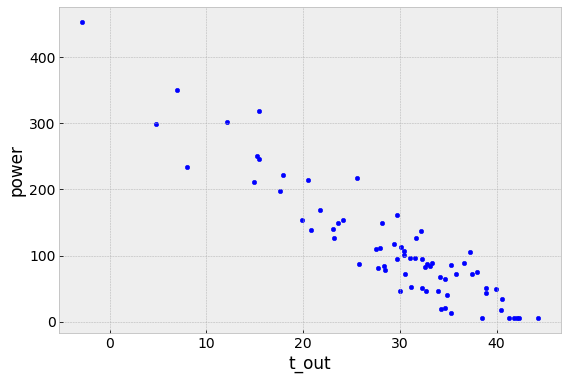

In [39]:
# Experiment with different averaging intervals to see where the data settles down.
plot_avg_power(dfd, '3D')

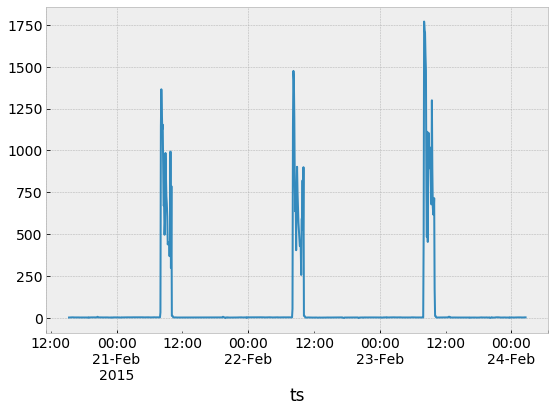

In [17]:
dfd_5min = dfd.resample('5min').mean()
dfd_5min[40000:41000].power.plot()